In [1]:
# import libraries

import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numba.core.errors import NumbaDeprecationWarning
import warnings
warnings.filterwarnings("ignore", category=NumbaDeprecationWarning)
import umap

In [2]:
df = pd.read_csv('HHH16 & C16 & D16.csv', header=None) # load dataframe
df.rename(columns={128: 'class'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,class,129
0,0.007184,0.004616,0.010820,0.004387,0.004163,0.004558,0.016757,0.004325,0.004747,0.004154,...,0.004957,0.004435,0.024813,0.005535,0.007658,0.006148,0.004585,0.004069,4,0.917627
1,0.008803,0.018381,0.004913,0.006716,0.006889,0.008101,0.004127,0.005139,0.003665,0.010748,...,0.006235,0.003725,0.004807,0.005621,0.015326,0.003911,0.007727,0.005103,9,0.997948
2,0.004425,0.004460,0.016845,0.005133,0.022127,0.004656,0.007133,0.005643,0.004944,0.015229,...,0.004145,0.004553,0.004352,0.004560,0.004490,0.005392,0.006949,0.014629,12,0.998761
3,0.021289,0.005369,0.005501,0.006017,0.005423,0.005552,0.007344,0.005182,0.004603,0.004155,...,0.004715,0.006405,0.024319,0.006133,0.007460,0.007146,0.008309,0.004141,6,0.999187
4,0.004478,0.006202,0.017932,0.005535,0.017951,0.004830,0.007146,0.005984,0.005203,0.013896,...,0.004361,0.004608,0.004478,0.004672,0.007047,0.006087,0.007610,0.012260,12,0.995541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.005288,0.007098,0.006678,0.007454,0.016454,0.006814,0.005628,0.007402,0.005195,0.012714,...,0.005944,0.010694,0.004895,0.005552,0.006171,0.004834,0.020021,0.015990,11,0.706236
9996,0.004875,0.006783,0.004491,0.006013,0.004942,0.006265,0.006077,0.006376,0.013911,0.004810,...,0.026212,0.016826,0.004779,0.004771,0.007368,0.008765,0.006807,0.005328,2,0.989956
9997,0.006758,0.007932,0.004528,0.011453,0.005370,0.009231,0.005968,0.008952,0.019767,0.004725,...,0.010427,0.005614,0.005057,0.005372,0.011693,0.012488,0.005780,0.005465,14,0.511965
9998,0.006082,0.007823,0.004267,0.010736,0.004522,0.009771,0.005497,0.008766,0.022667,0.004283,...,0.009332,0.004350,0.004639,0.005054,0.011797,0.014464,0.004367,0.004691,13,0.935989


In [3]:
# separate features and labels

features = df.loc[:, 0:127]
target = df.loc[:, 'class']

In [4]:
# scale features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [5]:
# reduce dimension using umap

reduce = umap.UMAP(n_components=2, random_state=42)
embedding = reduce.fit_transform(X_scaled)

In [6]:
# visualize umap

Xax = embedding[:, 0]
Yax = embedding[:, 1]

In [7]:
cdict = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm', 5: 'c', 6: 'crimson', 7: 'maroon', 8: 'coral', 9: 'sienna', 10: 'orange',
         11: 'gray', 12: 'gold', 13: 'brown', 14: 'lime', 15: 'dodgerblue'}
labl = {0: 'cluster 1', 1: 'cluster 2', 2: 'cluster 3', 3: 'cluster 4', 4: 'cluster 5', 5: 'cluster 6', 6: 'cluster 7',
        7: 'cluster 8', 8: 'cluster 9', 9: 'cluster 10', 10: 'cluster 11', 11: 'cluster 12', 12: 'cluster 13', 13: 'cluster 14',
       14: 'cluster 15', 15: 'cluster 16'}
marker = {0: 'o', 1: 'v', 2: '*', 3: '+', 4: 'x', 5: 'd', 6: 's', 7: 'p', 8: ',', 9: '^', 10: '<', 11: '>', 12: '.', 13: '1',
         14: '2', 15: '3'}
alpha = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.5, 11: 0.5, 12: 0.5, 13: 0.5,
        14: 0.5, 15: 0.5}

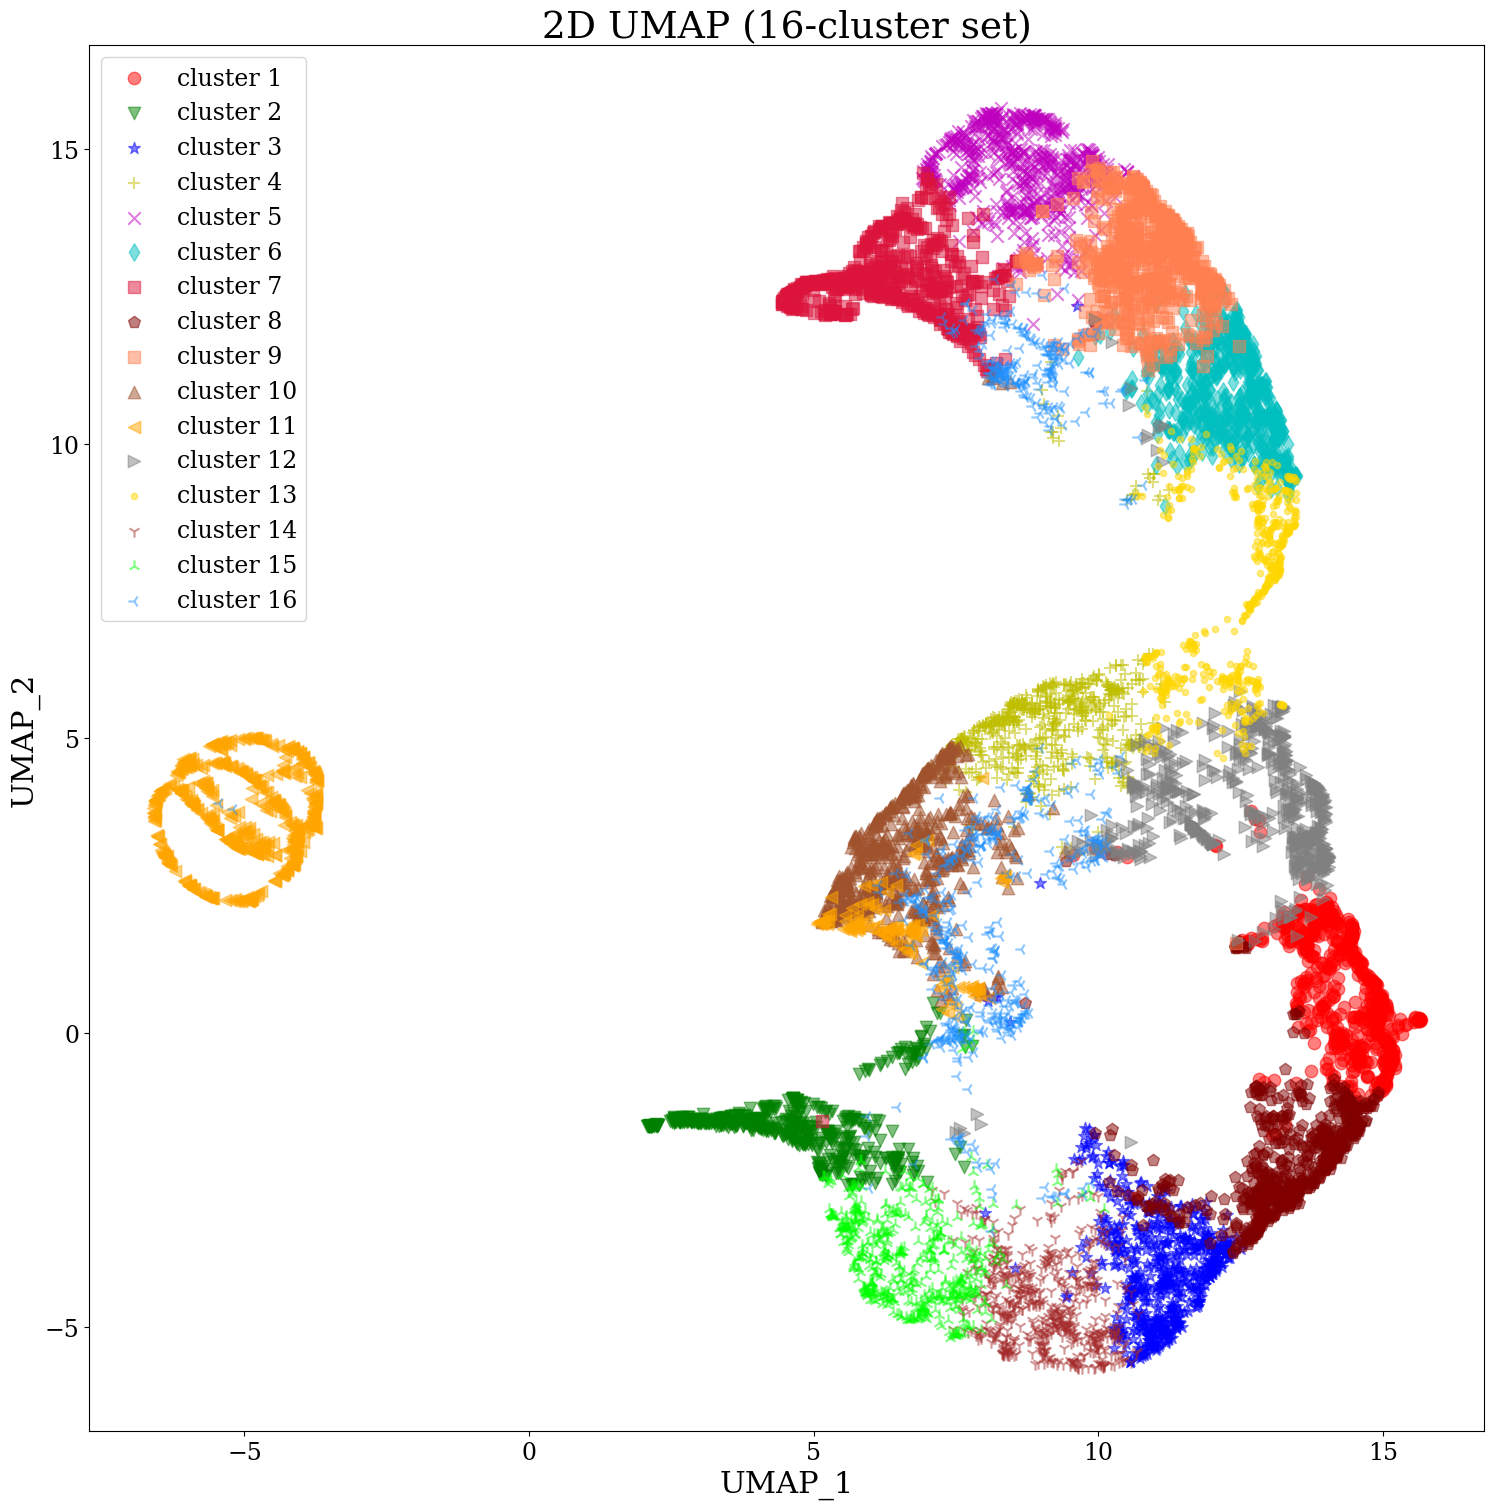

In [8]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
fig = plt.figure(figsize = (18, 18))
ax = fig.add_subplot(111)
fig.patch.set_facecolor('white')
for k in np.unique(target):
    ix = np.where(target == k)
    ax.scatter(Xax[ix], Yax[ix], c = cdict[k], s = 80, label = labl[k], marker = marker[k], alpha = alpha[k])
ax.set_xlabel('UMAP_1', fontsize = 22)
ax.set_ylabel('UMAP_2', fontsize = 22)
ax.legend(loc=0, prop={"size":17})
ax.set_title('2D UMAP (16-cluster set)', fontsize = 27)
ax.xaxis.set_tick_params(labelsize = 17)
ax.yaxis.set_tick_params(labelsize = 17);